In [11]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

path_5_prot="/home/jkipen/ProtInfGPU/results/5_Prot/"

In [7]:
df_orcale_err=pd.read_csv(path_5_prot+'ToPlotIntSeminar/Oracle/Err1/ErrVsEpochs.csv')  
df_orcale_Noerr=pd.read_csv(path_5_prot+'ToPlotIntSeminar/Oracle/NoErr/ErrVsEpochs.csv')  

df_small_N10=pd.read_csv(path_5_prot+'ToPlotIntSeminar/SmallModelSparse/SmallN10/ErrVsEpochs.csv')  
df_small_N30=pd.read_csv(path_5_prot+'ToPlotIntSeminar/SmallModelSparse/SmallN30/ErrVsEpochs.csv')  
df_small_N100=pd.read_csv(path_5_prot+'ToPlotIntSeminar/SmallModelSparse/SmallN100/ErrVsEpochs.csv')  

df_large_N30=pd.read_csv(path_5_prot+'ToPlotIntSeminar/LargeModelSparse/LargeN30/ErrVsEpochs.csv')  

In [14]:
arr_orcale_err=df_orcale_err.to_numpy()
arr_orcale_Noerr=df_orcale_Noerr.to_numpy()

arr_small_N10=df_small_N10.to_numpy()
arr_small_N30=df_small_N30.to_numpy()
arr_small_N100=df_small_N100.to_numpy()

arr_large_N30=df_large_N30.to_numpy()

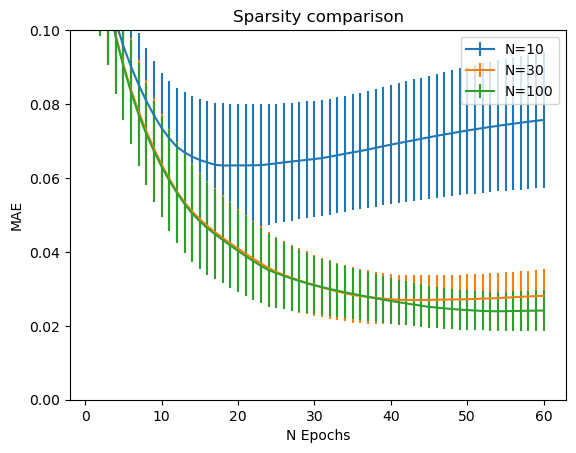

In [19]:
plt.figure()
plt.ylabel("MAE")
plt.xlabel("N Epochs")
plt.errorbar(arr_small_N10[:,0], arr_small_N10[:,1],  yerr=arr_small_N10[:,2]/2, label= "N=10")
plt.errorbar(arr_small_N30[:,0], arr_small_N30[:,1],  yerr=arr_small_N30[:,2]/2, label= "N=30")
plt.errorbar(arr_small_N100[:,0], arr_small_N100[:,1],  yerr=arr_small_N100[:,2]/2, label= "N=100")
plt.legend()
plt.title("Sparsity comparison")
plt.ylim([0, 0.1])
plt.show()

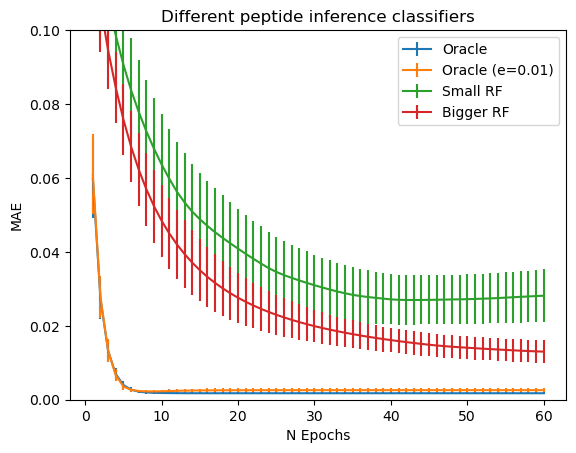

In [26]:
plt.figure()
plt.ylabel("MAE")
plt.xlabel("N Epochs")
plt.errorbar(arr_orcale_Noerr[:,0], arr_orcale_Noerr[:,1],  yerr=arr_orcale_Noerr[:,2]/2, label= "Oracle")
plt.errorbar(arr_orcale_err[:,0], arr_orcale_err[:,1],  yerr=arr_orcale_err[:,2]/2, label= "Oracle (e=0.01)")
plt.errorbar(arr_small_N30[:,0], arr_small_N30[:,1],  yerr=arr_small_N30[:,2]/2, label= "Small RF")
plt.errorbar(arr_large_N30[:,0], arr_large_N30[:,1],  yerr=arr_large_N30[:,2]/2, label= "Bigger RF")
plt.legend()
plt.title("Different peptide inference classifiers")
plt.ylim([0, 0.1])
plt.show()

In [24]:
print(np.min(arr_orcale_Noerr[:,1]))
print(np.min(arr_orcale_err[:,1]))
print(np.min(arr_large_N30[:,1]))
print(np.min(arr_small_N100[:,1]))
print(np.min(arr_small_N30[:,1]))


0.001752
0.002244
0.013011
0.023927
0.026983


In [36]:
ds_npz_file="/home/jkipen/raid_storage/ProtInfGPU/data/5_Prot/numpy/rf_n_est_10_depth_10/CrossVal/ds_0.npz"

MAE=[]
for i in range(10):
    ds_npz_file = "/home/jkipen/raid_storage/ProtInfGPU/data/5_Prot/numpy/rf_n_est_10_depth_10/CrossVal/ds_" + str(i) +".npz"
    base=np.load(ds_npz_file)
    MAE.append(np.mean(np.abs(0.2-base["true_prot_dist"])))


In [37]:
print(MAE)

[0.1481115249652765, 0.11485441866538652, 0.11700182839002618, 0.1755665604125583, 0.21619695626318353, 0.14472303644343917, 0.1348939818790924, 0.21045584019547608, 0.032334425365984305, 0.11272217491928434]


In [38]:
print(np.mean(MAE))


0.14068607474997075
